# Preparacion de Datos 
## Base de datos de pasajeros del Titanic
## Python
por Jose R. Zapata

Mineria de Datos, UPB

In [33]:
# Importar librerias
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Problema a resolver con los datos
¿Se podra determinar si un pasajero Sobrevivio conociendo los datos personales y datos de embarcacion?


# 1. Cargar Datos

In [34]:
# Cargar archivos
df = pd.read_excel('titanic3.xls')
df.head() # muestra las primeras 5 filas

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Informacion de la tabla

-  class: Passenger class (1 = first; 2 = second; 3 = third)
-  sirvived: (1 if survived or 0 if not)
-  name: Name
-  sex: Sex
-  age: Age
-  sibsp: Number of siblings/spouses aboard
-  parch: Number of parents/children aboard
-  ticket: Ticket number
-  fare: Passenger fare
-  cabin: Cabin
-  embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S =
   Southampton)
-  boat: Lifeboat (if survived)
-  body: Body number (if did not survive and body was recovered)

# 2. Descripcion de datos

In [35]:
# De que tipo son las variables
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [36]:
# Cuantas filas y columnas tiene la tabla
# Filas = Numero de pasajeros
# Col = Numero de atributos
df.shape

(1309, 14)

In [37]:
print('Numero de pasajeros = {}'.format(len(df)))

Numero de pasajeros = 1309


In [38]:
# Que pasa si se eliminan todos las filas y columnas con datos faltantes
df.dropna().shape

(0, 14)

In [39]:
# Realizar un analisis estadistico de las variables numericas
# Segun el tipo 
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [40]:
# Donde se subieron
# esta es una variable categorica
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

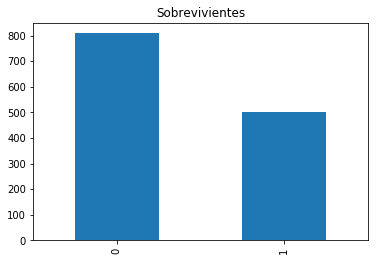

In [41]:
# Cuantas personas sobrevivieron
# Observar los valores de la variable
df['survived'].value_counts().plot(kind='bar',title = 'Sobrevivientes');

In [42]:
# numero de personas por cabina
df.cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C78                4
C22 C26            4
F33                4
B96 B98            4
F4                 4
F2                 4
D                  4
B58 B60            3
E101               3
A34                3
E34                3
B51 B53 B55        3
C101               3
B71                2
C2                 2
E46                2
B78                2
E31                2
C46                2
B77                2
E8                 2
C32                2
C85                2
C31                2
E67                2
B45                2
D17                2
                  ..
B61                1
D38                1
A23                1
C70                1
F E57              1
A7                 1
B94                1
B37                1
B11                1
C148               1
C91                1
C90                1
D49                1
B102               1
C111               1
B52 B54 B56        1
E12          

# 3. Preparacion de datos 
## Seleccion de variables
lo hago de primero para liberar memoria al borrar variables que no son necesarias

In [43]:
# Ya se tiene la columna de si la persona sobrevivio, no es necesario las columnas de boat y body
# se puede borrar la columna, o crear una tabla nueva solo con las columnas que necesito
# Este comendao solo se puede ejecutar una vez, luego seria un error por que no existen las columnas
del df['boat'] # borrar por columna
del df['body']
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [44]:
# el nombre, el numero del tiquete y cuanto pago por ello no parecen datos relevantes, 
# es mucho mas importante saber en que cabina estaban no cuanto pagaron.
df = df.drop(['name','ticket','fare','home.dest'],axis=1) #eliminar varias columnas al mismo tiempo
df.head()

,pclass,survived,sex,age,sibsp,parch,cabin,embarked
0,1,1,female,29.0000,0,0,B5,S
1,1,1,male,0.9167,1,2,C22 C26,S
2,1,0,female,2.0000,1,2,C22 C26,S
3,1,0,male,30.0000,1,2,C22 C26,S
4,1,0,female,25.0000,1,2,C22 C26,S


## Transformacion de los datos
La mayoria de los datos debe ser numerico para procesarlos,
se convertiran los datos categoricos a numericos

In [45]:
# determinar el tipo de cada uno de los datos
df.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
cabin        object
embarked     object
dtype: object

In [46]:
# verificar cuantos hay tipo numerico y cuantos tipo object
df.dtypes.value_counts()

int64      4
object     3
float64    1
dtype: int64

Las variables categoricas que entregan informacion que se pueden convertir serian:
- pclass (esta variable se representa por numeros pero es categorica)
- sex
- cabin
- embarked

In [47]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
# get dummies convertir datos categoricos en una variable indicativa
# es 1 si cumple la condicion o es 0 si no la cumple

dummy_cols = 'pclass,sex,cabin,embarked'.split(",")# es mas rapido escribir asi esta lista :)
df2 = pd.get_dummies(df, columns=dummy_cols)
cols = [c for c in df2.columns if c not in dummy_cols]
X = df2[cols]

In [48]:
X.head()

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.9167,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,30.0000,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,25.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
X.dtypes

survived           int64
age              float64
sibsp              int64
parch              int64
pclass_1           uint8
pclass_2           uint8
pclass_3           uint8
sex_female         uint8
sex_male           uint8
cabin_A10          uint8
cabin_A11          uint8
cabin_A14          uint8
cabin_A16          uint8
cabin_A18          uint8
cabin_A19          uint8
cabin_A20          uint8
cabin_A21          uint8
cabin_A23          uint8
cabin_A24          uint8
cabin_A26          uint8
cabin_A29          uint8
cabin_A31          uint8
cabin_A32          uint8
cabin_A34          uint8
cabin_A36          uint8
cabin_A5           uint8
cabin_A6           uint8
cabin_A7           uint8
cabin_A9           uint8
cabin_B10          uint8
                  ...   
cabin_E39 E41      uint8
cabin_E40          uint8
cabin_E44          uint8
cabin_E45          uint8
cabin_E46          uint8
cabin_E49          uint8
cabin_E50          uint8
cabin_E52          uint8
cabin_E58          uint8


In [50]:
# verificar si son numericos
X.dtypes.value_counts()

uint8      194
int64        3
float64      1
dtype: int64

## Limpieza de datos

In [51]:
# Buscar los valores tipo NaN
# verifica en todo el data frame si la condicion es falsa o verdadera
X.isnull()

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
# Buscar los valores tipo NaN por columna
# Columnas con valores faltantes
X.isnull().any(axis=0)

survived         False
age               True
sibsp            False
parch            False
pclass_1         False
pclass_2         False
pclass_3         False
sex_female       False
sex_male         False
cabin_A10        False
cabin_A11        False
cabin_A14        False
cabin_A16        False
cabin_A18        False
cabin_A19        False
cabin_A20        False
cabin_A21        False
cabin_A23        False
cabin_A24        False
cabin_A26        False
cabin_A29        False
cabin_A31        False
cabin_A32        False
cabin_A34        False
cabin_A36        False
cabin_A5         False
cabin_A6         False
cabin_A7         False
cabin_A9         False
cabin_B10        False
                 ...  
cabin_E39 E41    False
cabin_E40        False
cabin_E44        False
cabin_E45        False
cabin_E46        False
cabin_E49        False
cabin_E50        False
cabin_E52        False
cabin_E58        False
cabin_E60        False
cabin_E63        False
cabin_E67        False
cabin_E68  

In [53]:
# Buscar los valores tipo NaN por fila
# Filas con valores faltantes
X.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1279    False
1280    False
1281    False
1282     True
1283     True
1284     True
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291     True
1292     True
1293     True
1294    False
1295    False
1296    False
1297     True
1298    False
1299    False
1300    False
1301    False
1302     True
1303     True
1304    False
1305     True
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [54]:
# Cuales son las Filas con datos faltantes
X[X.isnull().any(axis=1)]

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
15,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
37,1,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
40,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
46,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
59,1,NaN,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
69,1,NaN,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
70,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
74,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
80,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
106,0,NaN,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# Que pasa si borro todas las filas con datos incompletos, cuantas filas me quedan?
X.dropna().shape

(1046, 198)

In [56]:
# Como el dato que falta es de la variable edad
# una solucion que no afecta estadisticamente, seria tomar la Mediana de la edad
X['age'].median()

28.0

In [57]:
# Luego se Reemplaza los datos con la media
X = X.fillna(X['age'].median())
X

,survived,age,sibsp,parch,pclass_1,pclass_2,pclass_3,sex_female,sex_male,cabin_A10,...,cabin_F G73,cabin_F2,cabin_F33,cabin_F38,cabin_F4,cabin_G6,cabin_T,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.9167,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,30.0000,1,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,25.0000,1,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,48.0000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,63.0000,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,39.0000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,1,53.0000,2,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,71.0000,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# Falta algun dato?
X.isnull().any(axis=0).any()

False